In [1]:
from PIL import Image
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torchvision
from torchvision import transforms
import shutil

In [2]:
import tensorflow
import pandas as pd 
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import random
import os
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
import keras
from keras import backend as K
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing import image
from keras.models import Model
from keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow_datasets as tfds
import glob
print(os.listdir("data/train"))

['bicycle', 'bikedir', 'kickboard', 'motor_cycle', 'mountain_bike', 'road_bike', 'traindir']


In [3]:
base_dir = 'data/train'
imgb_dir = 'data/train/bicycle'
imgk_dir = 'data/train/kickboard'
imgm_dir = 'data/train/motor_cycle'
test_dir='data/test'
bikem_dir='data/train/mountain_bike'
biker_dir='data/train/road_bike'

In [4]:
trans = transforms.Compose([#transforms.Resize((256,256)),
                           transforms.ToTensor(),
                           transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                           ])
trainset = torchvision.datasets.ImageFolder(root="data/train", transform=trans)

In [5]:
FAST_RUN = False
IMAGE_WIDTH=256
IMAGE_HEIGHT=256
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

In [6]:
trainset.__getitem__(18)

(tensor([[[-0.0980, -0.1059, -0.1137,  ..., -0.1686, -0.1373, -0.1373],
          [-0.0980, -0.1059, -0.1216,  ..., -0.1765, -0.1294, -0.1294],
          [-0.1059, -0.1137, -0.1294,  ..., -0.1922, -0.1686, -0.1686],
          ...,
          [ 0.0902,  0.1137,  0.0431,  ..., -0.0745, -0.0118, -0.0118],
          [ 0.1608,  0.1529, -0.0431,  ..., -0.0510, -0.0118, -0.0118],
          [ 0.2000,  0.1922, -0.0667,  ..., -0.0431, -0.0039, -0.0039]],
 
         [[ 0.1529,  0.1451,  0.1373,  ..., -0.0745, -0.0431, -0.0431],
          [ 0.1529,  0.1451,  0.1294,  ..., -0.0824, -0.0353, -0.0353],
          [ 0.1451,  0.1373,  0.1216,  ..., -0.0980, -0.0745, -0.0745],
          ...,
          [ 0.3412,  0.3647,  0.2627,  ...,  0.1922,  0.2549,  0.2549],
          [ 0.4118,  0.4039,  0.1765,  ...,  0.2157,  0.2549,  0.2549],
          [ 0.4510,  0.4431,  0.1529,  ...,  0.2235,  0.2627,  0.2627]],
 
         [[ 0.3490,  0.3412,  0.3333,  ...,  0.0196,  0.0510,  0.0510],
          [ 0.3490,  0.3412,

In [7]:
trainloader=DataLoader(trainset,
                      shuffle=False,
                      num_workers =4)

In [8]:
len(trainset)

2839

In [9]:
classes = trainset.classes
classes

['bicycle',
 'bikedir',
 'kickboard',
 'motor_cycle',
 'mountain_bike',
 'road_bike',
 'traindir']

In [10]:
#bike_dir = os.path.join(base_dir,'bikedir')
# train_dir = os.path.join(base_dir,'traindir')
#os.mkdir(train_dir)

In [11]:
#bicycle_names= os.listdir(imgb_dir)

In [12]:
#kickboard_names = os.listdir(imgk_dir)

In [13]:
#motor_names = os.listdir(imgm_dir)

In [14]:
# test_names = os.listdir(test_dir)

In [15]:
#mountain_names = os.listdir(bikem_dir)

In [16]:
road_names = os.listdir(biker_dir)

In [17]:
# 크롤링된 이미지 0-i까지 순환처리용
# i=449
# for name in road_names:
#     src = os.path.join(biker_dir, name)
#     dst = 'bicycle_'+str(i)+'.jpg'
#     dst = os.path.join(biker_dir, dst)
#     os.rename(src,dst)
#     i += 1

In [18]:
#이미지 복사 및 폴더 이동
# fnames=['bicycle_{}.jpg'.format(i) for i in range(10)]

# for fname in fnames:
#     src = os.path.join(imgb_dir,fname)
#     dst = os.path.join(test_dir,fname)
#     shutil.copyfile(src,dst)

In [19]:
#이미지 복사 및 폴더 이동
# fnames=['motor_{}.jpg'.format(i) for i in range(10)]

# for fname in fnames:
#     src = os.path.join(imgm_dir,fname)
#     dst = os.path.join(test_dir,fname)
#     shutil.copyfile(src,dst)

In [20]:
#이미지 복사 및 폴더 이동
# fnames=['kickboard_{}.jpg'.format(i) for i in range(10)]

# for fname in fnames:
#     src = os.path.join(imgk_dir,fname)
#     dst = os.path.join(test_dir,fname)
#     shutil.copyfile(src,dst)

In [21]:
# os.listdir(bike_dir)

In [22]:
bikes = os.listdir("data/train/traindir")
categories = []
for bike in bikes:
    category = bike.split('_')[0]
    if category == 'bicycle':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': bikes,
    'category': categories
})

In [23]:
df.tail(240)

,filename,category
1075,motor_224.jpg,0
1076,motor_225.jpg,0
1077,motor_226.jpg,0
1078,motor_227.jpg,0
1079,motor_228.jpg,0
...,...,...
1310,motor_95.jpg,0
1311,motor_96.jpg,0
1312,motor_97.jpg,0
1313,motor_98.jpg,0


<AxesSubplot:>

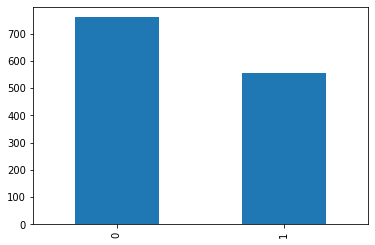

In [24]:
df['category'].value_counts().plot.bar()

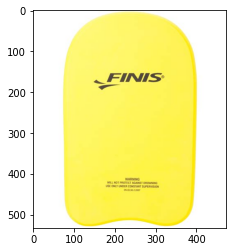

In [25]:
sample = random.choice(bikes)
image = keras.utils.load_img("data/train/traindir/"+sample)
plt.imshow(image)

In [26]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu',padding = 'same',input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu',padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 128)      0

In [27]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [28]:
earlystop = EarlyStopping(patience=10)

In [29]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.08,
                                            min_delta=0.01,
                                            cooldown=5,
                                            min_lr=0.000001)

In [30]:
callbacks = [earlystop, learning_rate_reduction]

In [31]:
df["category"] = df["category"].replace({0: 'Not Bike', 1: 'Bike'}) 

In [32]:
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=50)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

<AxesSubplot:>

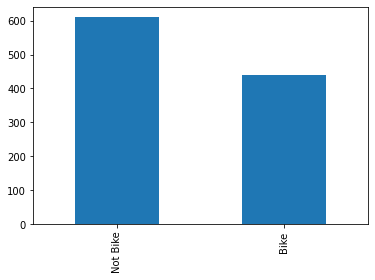

In [33]:
train_df['category'].value_counts().plot.bar()

<AxesSubplot:>

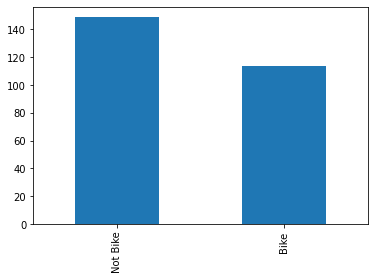

In [34]:
validate_df['category'].value_counts().plot.bar()

In [35]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=30

In [36]:
train_datagen = ImageDataGenerator(
    rotation_range=10,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "data/train/traindir", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 1052 validated image filenames belonging to 2 classes.


In [37]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "data/train/traindir", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 263 validated image filenames belonging to 2 classes.


In [38]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "data/train/traindir", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


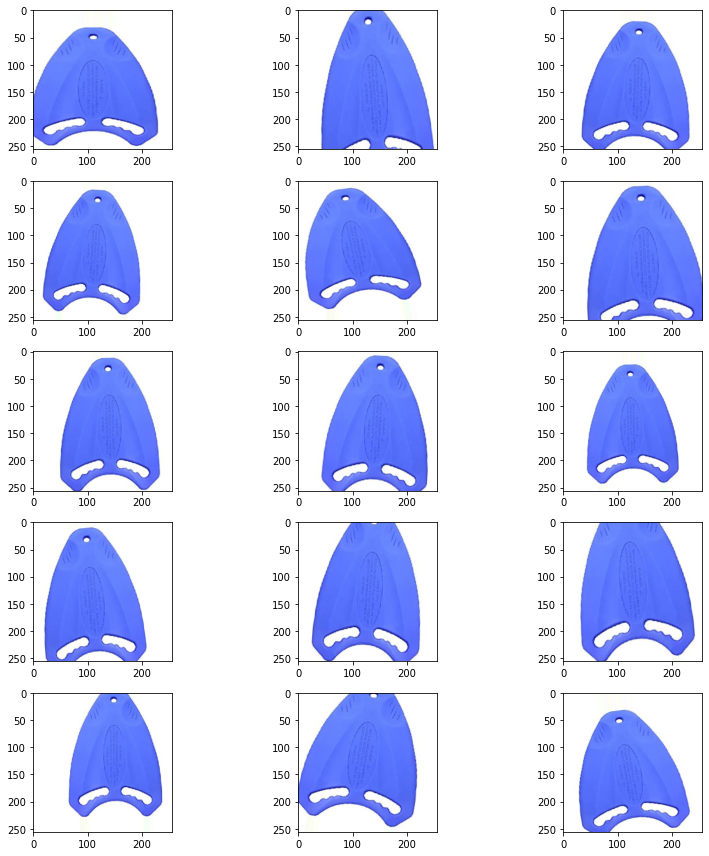

In [39]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

In [40]:
epochs=3 if FAST_RUN else 50
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/50
35/35 [==============================] - 99s 3s/step - loss: 0.6782 - accuracy: 0.6918 - val_loss: 4.6762 - val_accuracy: 0.4500 - lr: 0.0010
Epoch 2/50
35/35 [==============================] - 103s 3s/step - loss: 0.5690 - accuracy: 0.7524 - val_loss: 3.4828 - val_accuracy: 0.4958 - lr: 0.0010
Epoch 3/50
35/35 [==============================] - 105s 3s/step - loss: 0.4781 - accuracy: 0.7945 - val_loss: 0.4486 - val_accuracy: 0.8167 - lr: 0.0010
Epoch 4/50
35/35 [==============================] - 103s 3s/step - loss: 0.5045 - accuracy: 0.7867 - val_loss: 0.5578 - val_accuracy: 0.8042 - lr: 0.0010
Epoch 5/50
35/35 [==============================] - ETA: 0s - loss: 0.4225 - accuracy: 0.8072
Epoch 5: ReduceLROnPlateau reducing learning rate to 8.000000379979611e-05.
35/35 [==============================] - 103s 3s/step - loss: 0.4225 - accuracy: 0.8072 - val_loss: 1.0614 - val_accuracy: 0.6833 - lr: 0.0010
Epoch 6/50
35/35 [==============================] - 104s 3s/step - loss:

In [41]:
model.save_weights("model.h5")

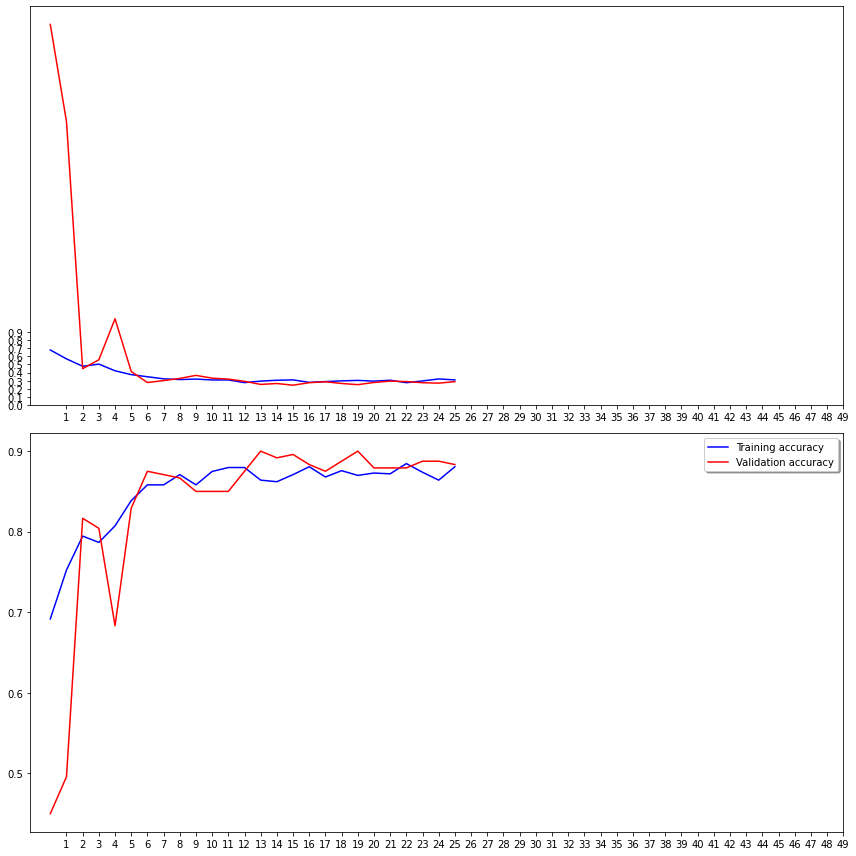

In [42]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show() 

In [43]:
test_filenames = os.listdir("data/test")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

In [44]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "data/test/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=True
)

Found 30 validated image filenames.


In [45]:
predict = model.predict(test_generator, steps=np.ceil(nb_samples/batch_size))

1/1 [==============================] - 1s 931ms/step


In [46]:
test_df['category'] = np.argmax(predict, axis=-1)

In [47]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [48]:
test_df['category'] = test_df['category'].replace({ 'Mountain': 1, 'Road': 0 })

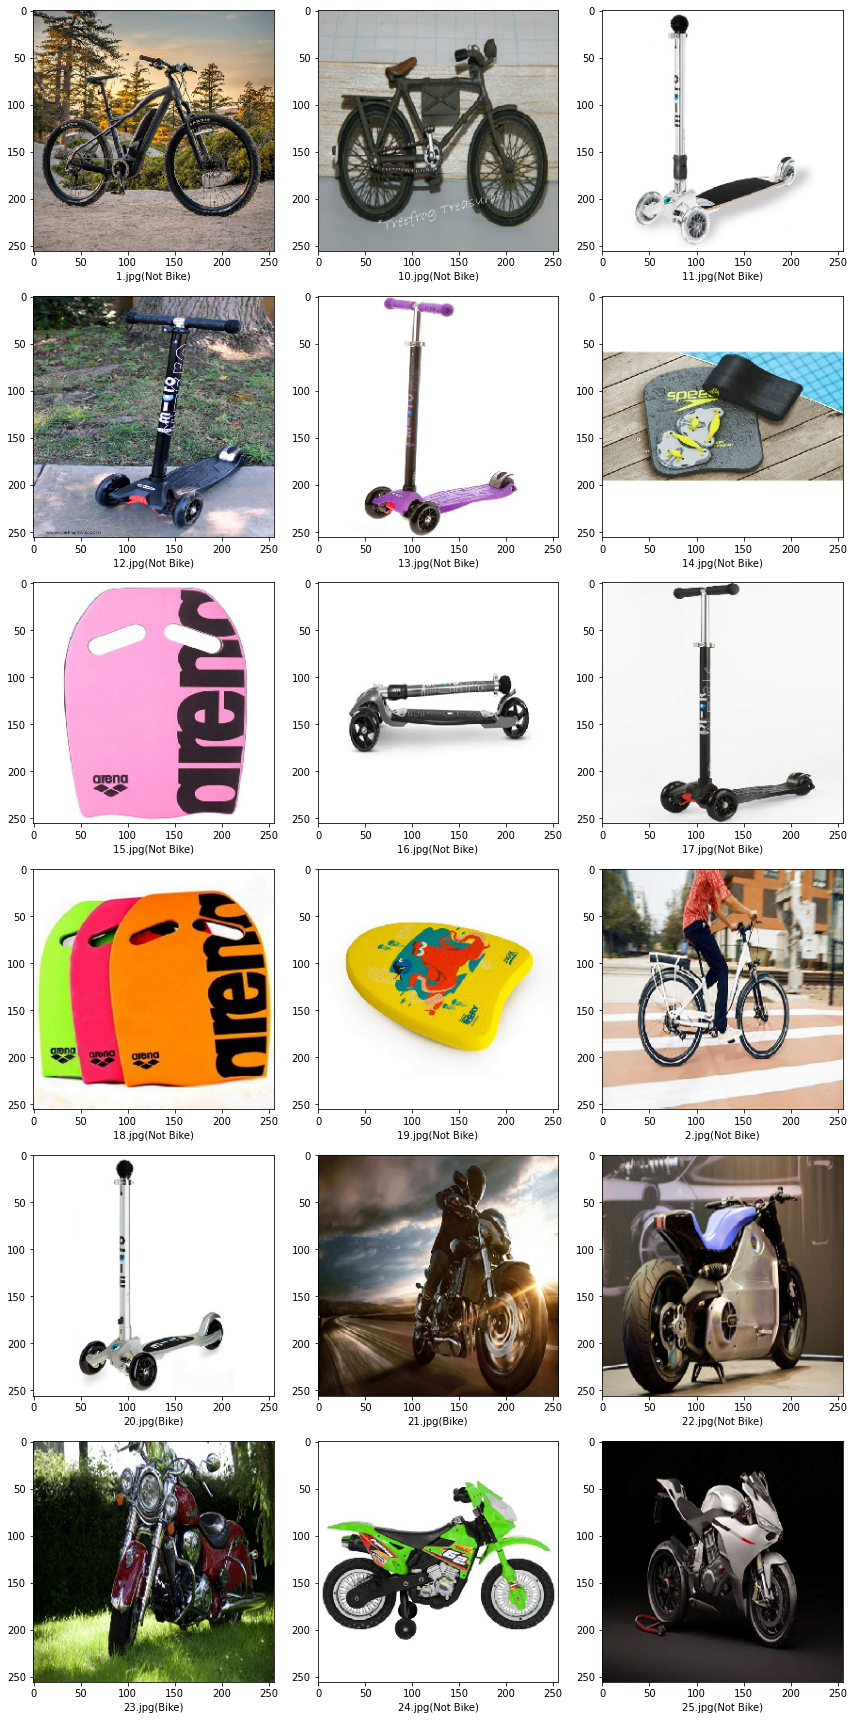

In [49]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = keras.utils.load_img("data/test/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

In [50]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)